In [43]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%load_ext nb_black

plt.rcParams["figure.figsize"] = (14, 7)

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [3]:
comps = pd.read_csv("../data/Comps.csv")
seasonality = pd.read_csv("../data/Seasonality.csv")

<IPython.core.display.Javascript object>

In [4]:
comps.head()

,url,beds,bath,rabbu Occupancy,rabbu ADR,manual Occupancy,manual ADR,Notes,Location,Stars,Review,Cleaning Fee,Host
0,https://www.airbnb.com/rooms/46038476,2,2,0.53,143,0.903226,134.0,NaN,North Bend,4.98,41,80.0,Superhost
1,https://www.airbnb.com/rooms/54064539,2,2,0.83,251,0.645161,245.0,"Too fancy, comp won’t compare",North Bend,4.99,75,95.0,Superhost
2,https://www.airbnb.com/rooms/52210633,2,1,0.70,189,0.645161,189.0,"No Dynamic Pricing, looks like a house, not a ...",North Bend,4.96,45,95.0,Superhost
3,https://www.airbnb.com/rooms/721062423659714038,2,2,0.73,387,0.580645,350.0,"Fancy, Cabin Style",North Bend,4.89,19,125.0,Superhost
4,https://www.airbnb.com/rooms/566008910384238034,2,1,0.67,283,0.451613,281.0,"Bad Photos, On River",North Bend,4.89,64,80.0,Superhost


<IPython.core.display.Javascript object>

In [7]:
np.quantile(comps.Stars[comps.Review > 10], q=[0.2, 0.4, 0.6, 0.8])

array([4.798, 4.888, 4.95 , 4.986])

<IPython.core.display.Javascript object>

<AxesSubplot: xlabel='Stars', ylabel='Count'>

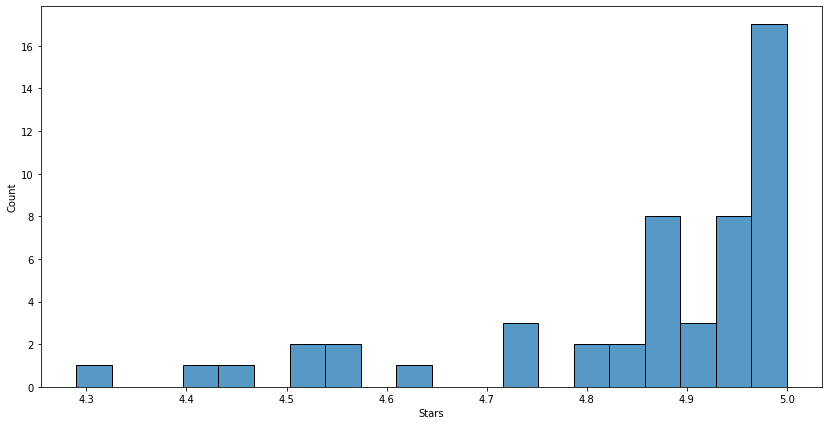

<IPython.core.display.Javascript object>

In [44]:
sns.histplot(comps.Stars, bins=20)

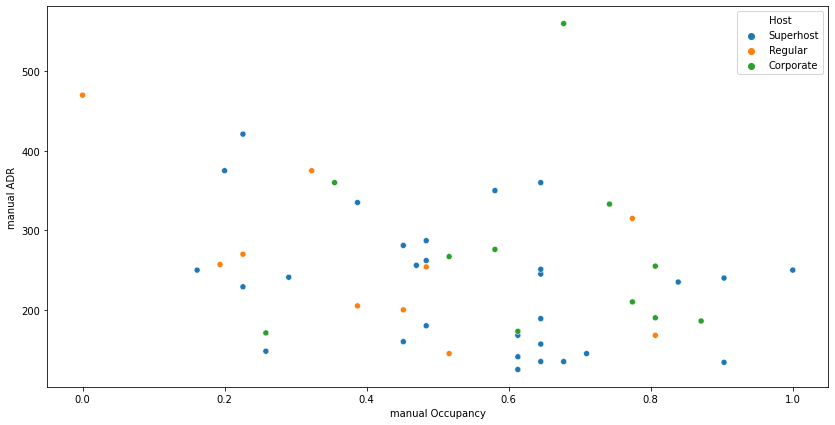

<IPython.core.display.Javascript object>

In [45]:
adr_vs_ocp = sns.scatterplot(
    data=comps, x="manual Occupancy", y="manual ADR", hue="Host"
)

In [22]:
comps.groupby(["Host"])["Stars"].count()

Host
Corporate    12
Regular      10
Superhost    29
Name: Stars, dtype: int64

<IPython.core.display.Javascript object>

In [42]:
mod_data = comps[["manual ADR", "manual Occupancy", "Host"]].copy()
mod_data = mod_data[mod_data["manual ADR"] <= 500]
mod_data = pd.get_dummies(data=mod_data, prefix="host", columns=["Host"])
mod_data.drop(columns=["host_Regular"], inplace=True)
mod_data.head()

,manual ADR,manual Occupancy,host_Corporate,host_Superhost
0,134.0,0.903226,0,1
1,245.0,0.645161,0,1
2,189.0,0.645161,0,1
3,350.0,0.580645,0,1
4,281.0,0.451613,0,1


<IPython.core.display.Javascript object>

In [23]:
from sklearn.linear_model import LinearRegression

<IPython.core.display.Javascript object>

In [31]:
mod_data[["manual Occupancy"]].to_numpy().shape

(49, 1)

<IPython.core.display.Javascript object>

In [39]:
mod_data[["manual Occupancy"]].to_numpy().reshape(-1, 1).shape

(49, 1)

<IPython.core.display.Javascript object>

In [41]:
lr_mod = LinearRegression()
lr_mod.fit(
    X=mod_data["manual Occupancy"].to_numpy().reshape(-1, 1), y=mod_data[["manual ADR"]]
)
lr_mod.coef_

array([[-144.26204633]])

<IPython.core.display.Javascript object>

In [58]:
lr_mod.intercept_[0]

317.76706624451714

<IPython.core.display.Javascript object>

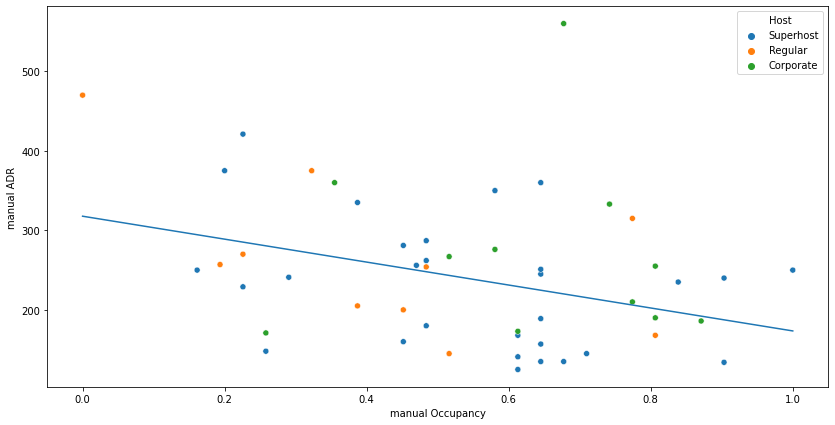

<IPython.core.display.Javascript object>

In [59]:
adr_vs_ocp = sns.scatterplot(
    data=comps, x="manual Occupancy", y="manual ADR", hue="Host"
)

occupancy_grid = np.linspace(0, 1, num=100)
adr_grid = [lr_mod.intercept_[0] + lr_mod.coef_[0] * op for op in occupancy_grid]
plt.plot(occupancy_grid, adr_grid)
plt.show()

In [66]:
adr_grid = np.ndarray.flatten(np.array(adr_grid))

<IPython.core.display.Javascript object>

In [68]:
occupancy_grid * adr_grid

array([  0.        ,   3.19504923,   6.36066023,   9.496833  ,
        12.60356754,  15.68086385,  18.72872193,  21.74714179,
        24.73612341,  27.6956668 ,  30.62577196,  33.52643889,
        36.39766759,  39.23945806,  42.0518103 ,  44.83472431,
        47.58820009,  50.31223764,  53.00683696,  55.67199805,
        58.30772091,  60.91400554,  63.49085194,  66.03826011,
        68.55623005,  71.04476176,  73.50385524,  75.93351049,
        78.33372751,  80.7045063 ,  83.04584686,  85.35774919,
        87.64021329,  89.89323916,  92.1168268 ,  94.31097621,
        96.47568738,  98.61096033, 100.71679505, 102.79319154,
       104.8401498 , 106.85766983, 108.84575163, 110.8043952 ,
       112.73360054, 114.63336765, 116.50369653, 118.34458717,
       120.15603959, 121.93805378, 123.69062974, 125.41376747,
       127.10746697, 128.77172824, 130.40655128, 132.01193608,
       133.58788266, 135.13439101, 136.65146113, 138.13909302,
       139.59728668, 141.0260421 , 142.4253593 , 143.79

<IPython.core.display.Javascript object>